In [2]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/customer segmentation.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    print(col,df[col].isnull().sum())

Income 24


In [8]:
df = df.dropna()


In [9]:
df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [10]:
## Z_CostContact,Z_Revenue has only one unique value so we can rem0ve them
df = df.drop(['Z_CostContact','Z_Revenue'],axis=1,)

In [11]:
part = df['Dt_Customer'].str.split('-',n=3,expand = True)
df["day"] = part[0].astype('int')
df["month"] = part[1].astype('int')
df["year"] = part[2].astype('int')

In [12]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

# **Replacing Alone,Absurd,Yolo to single**

In [13]:
df["Marital_Status"] = df["Marital_Status"].replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'})

In [14]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

# **Seperating float and object columns speratly**

In [15]:
floats = []
objects = []
for col in df.columns:
  if df[col].dtype == 'float64':
    floats.append(col)
  elif df[col].dtype == 'object':
    objects.append(col)

print(floats)
print(objects)

['Income']
['Education', 'Marital_Status', 'Dt_Customer']


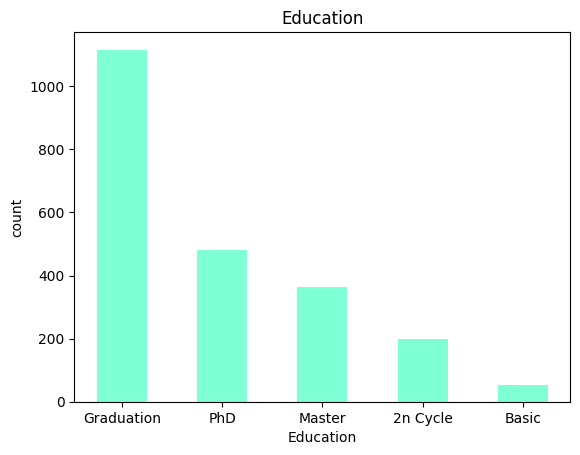

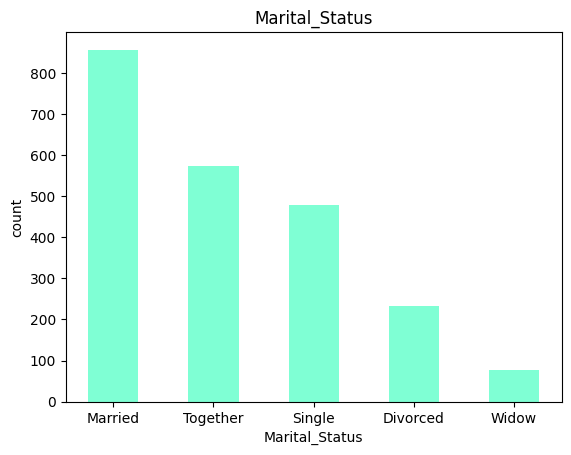

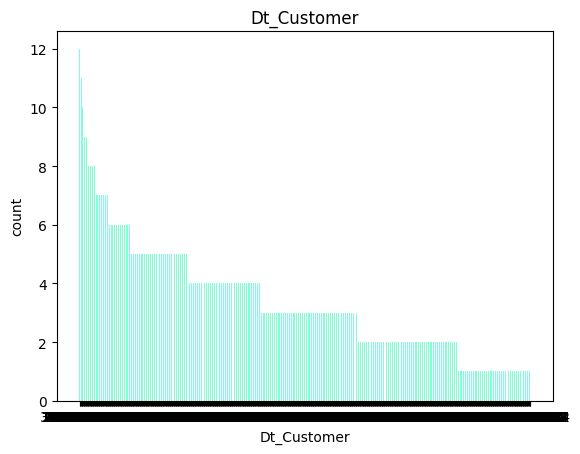

In [16]:
for i in objects:
  plt.bar(x=df[i].value_counts().index,
          height=df[i].value_counts(),
          width=0.5,color = 'aquamarine')
  plt.xlabel(i)
  plt.ylabel('count')
  plt.title(i)
  plt.show()

# converting object columns to integer for correlation matrix.
## Heatmap is the best way to visualize the correlation among the different features of dataset. Let's give it the value of 0.8

In [17]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [18]:
for col in df.columns:
  if df[col].dtype == object:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])



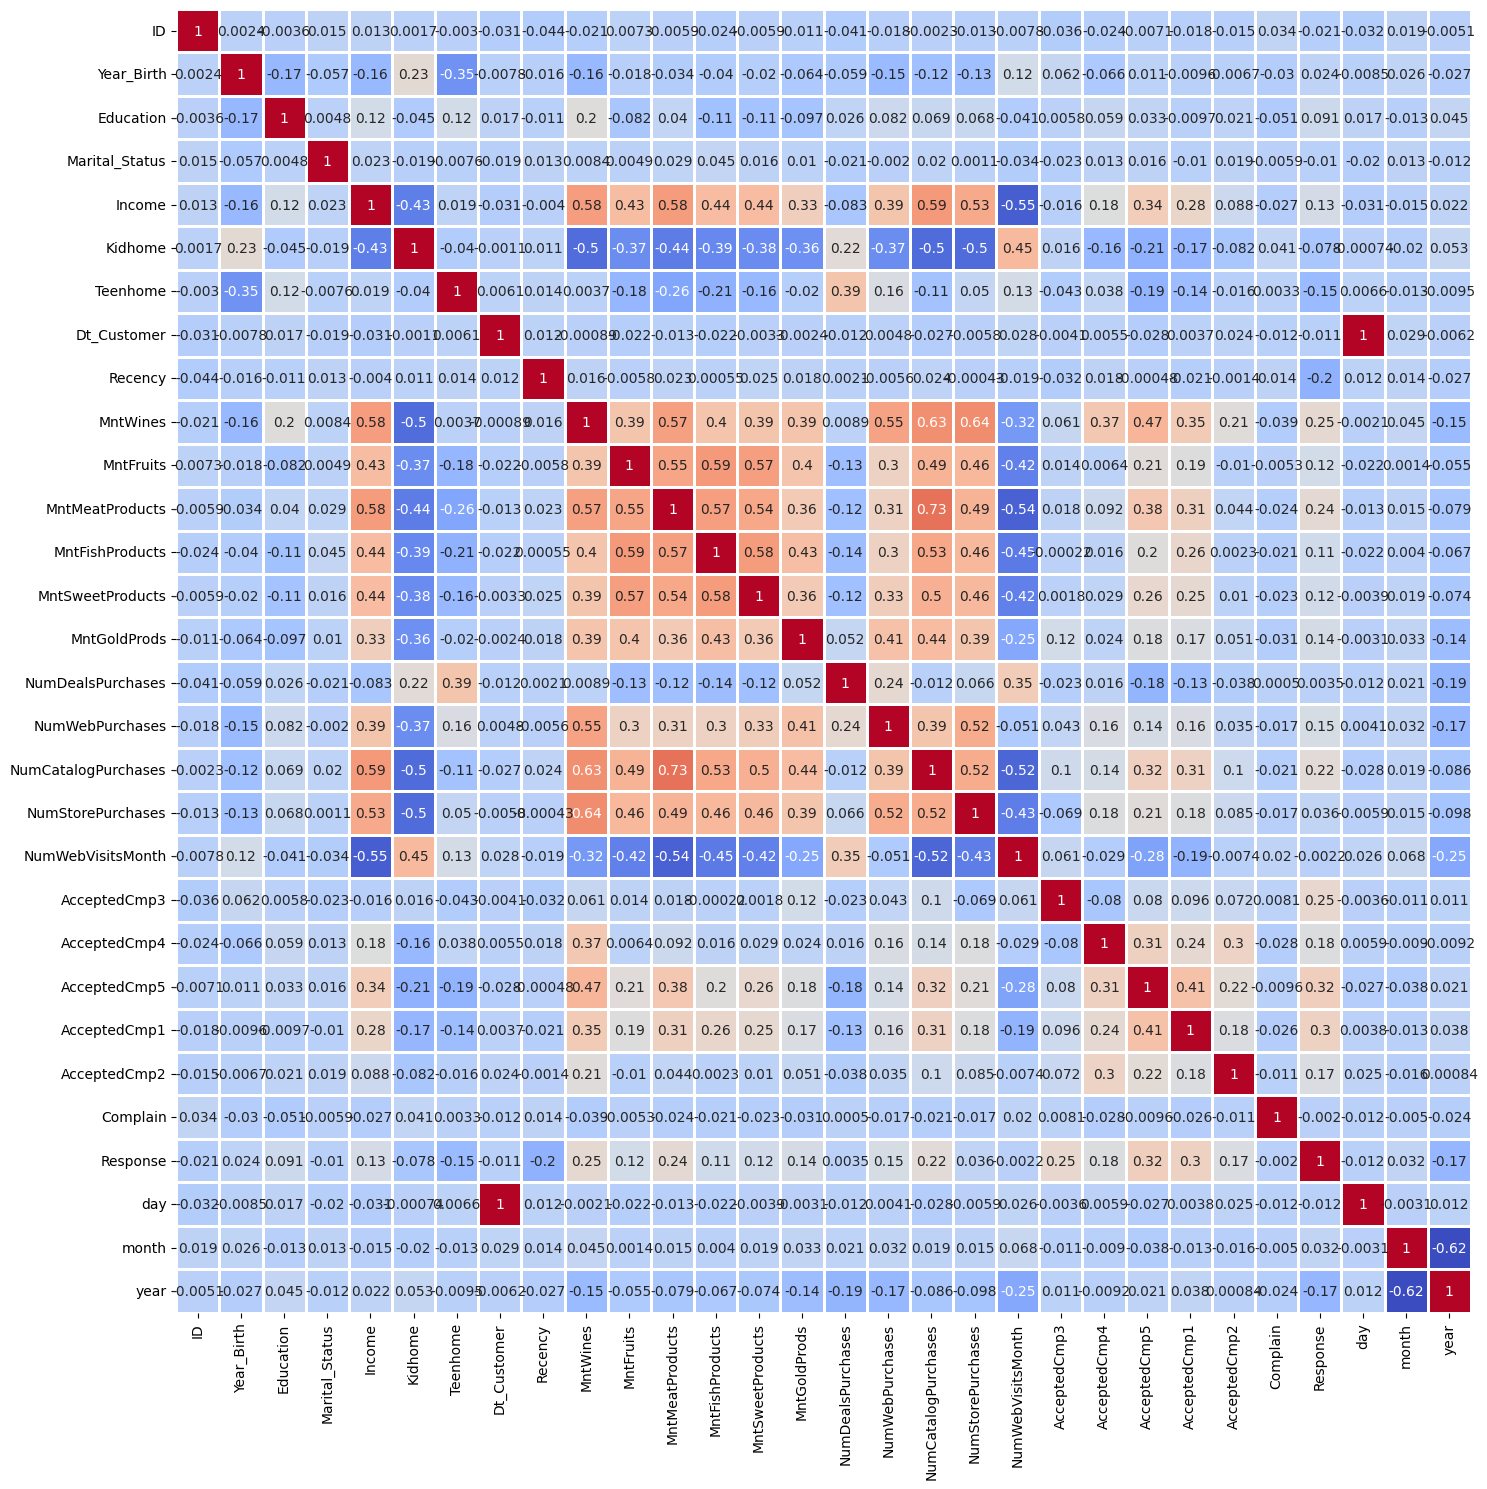

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True,linewidths=2,cbar = False,)
plt.tight_layout()
plt.show()

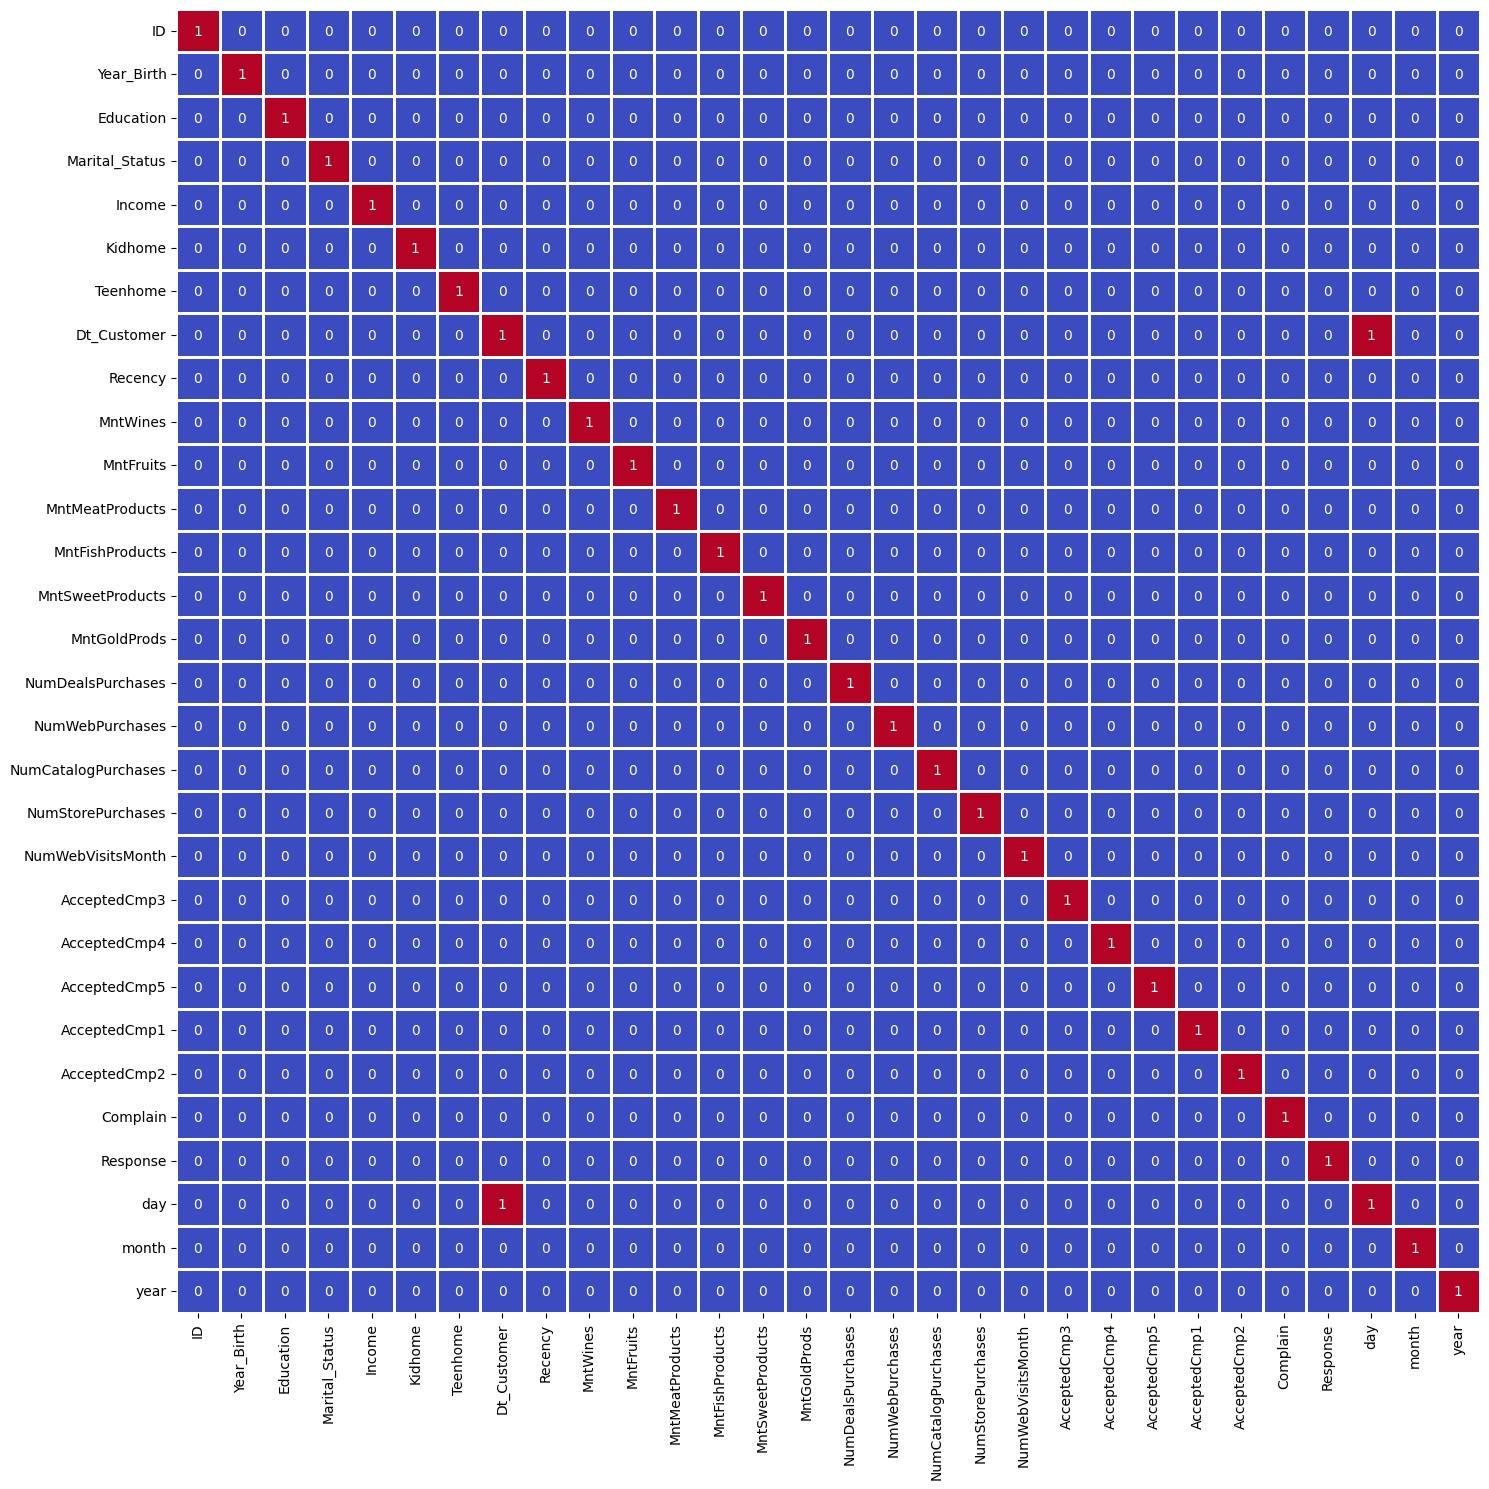

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()>0.8,cmap = 'coolwarm',annot = True,linewidths=2,cbar = False,)
plt.tight_layout()
plt.show()

Standardization is the method of feature scaling which is an integral part of feature engineering. It scales down the data and making it easier for the machine learning model to learn from it. It reduces the mean to ‘0’ and the standard deviation to ‘1’.

In [21]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

## We will be using T-distributed Stochastic Neighbor Embedding. It helps in visualizing high-dimensional data.

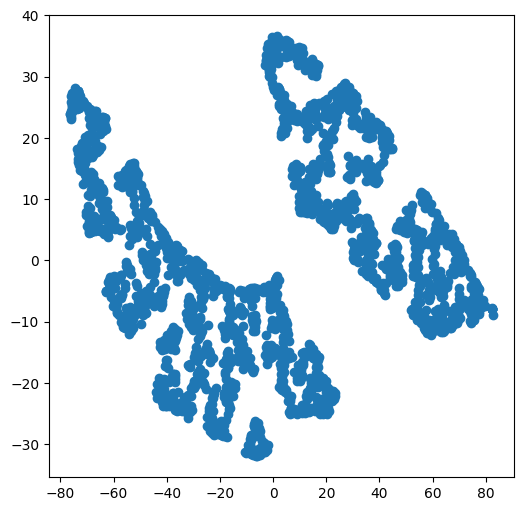

In [22]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

model = TSNE(n_components = 2 ,random_state=42)
tsne_df = model.fit_transform(df)
plt.figure(figsize=(6,6))
plt.scatter(tsne_df[:,0],tsne_df[:,1])
plt.show()

In [31]:
error = []
for n_cluster in range(1,21):
  model = KMeans(init = 'k-means++',n_clusters=n_cluster,
                 max_iter=500,random_state=22)
  model.fit(df)
  error.append(model.inertia_)

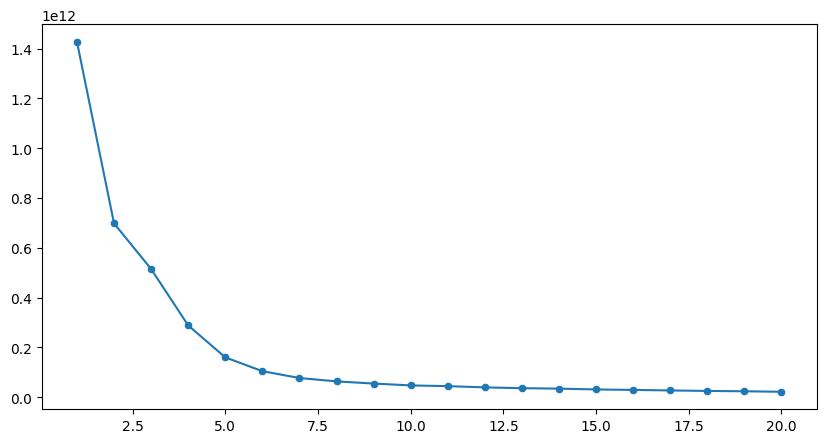

In [32]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()

## **Here by using the elbow method we can say that k = 6 is the optimal number of clusters that should be made as after k = 6 the value of the inertia is not decreasing drastically.**

In [33]:
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

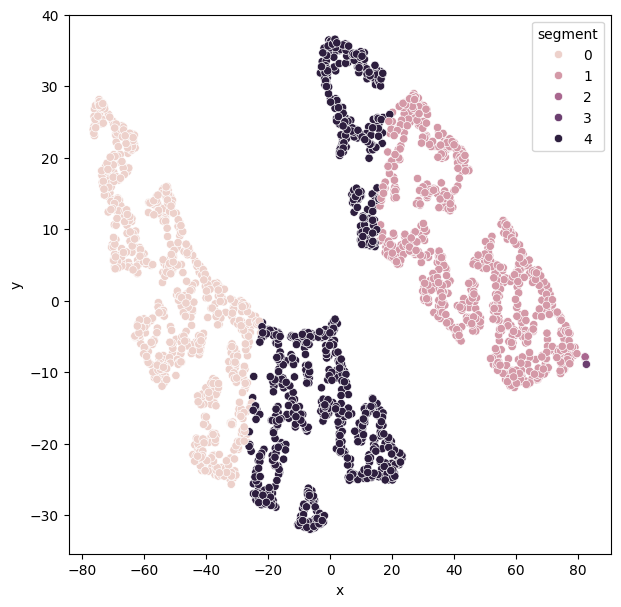

In [35]:
plt.figure(figsize=(7, 7))

tsne_df = pd.DataFrame(tsne_df, columns=['x', 'y'])
tsne_df['segment'] = segments

sns.scatterplot(x='x', y='y', hue='segment', data=tsne_df)
plt.show()